In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
df = pd.read_csv("aapl.csv", parse_dates=['Date'], index_col='Date')

In [26]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171


In [29]:
df['2017-06': '2017-09'].Close

Date
2017-07-07    144.18
2017-07-06    142.73
2017-07-05    144.09
2017-07-03    143.50
2017-06-30    144.02
2017-06-29    143.68
2017-06-28    145.83
2017-06-27    143.73
2017-06-26    145.82
2017-06-23    146.28
2017-06-22    145.63
2017-06-21    145.87
2017-06-20    145.01
2017-06-19    146.34
2017-06-16    142.27
2017-06-15    144.29
2017-06-14    145.16
2017-06-13    146.59
2017-06-12    145.42
2017-06-09    148.98
2017-06-08    154.99
2017-06-07    155.37
2017-06-06    154.45
2017-06-05    153.93
2017-06-02    155.45
2017-06-01    153.18
Name: Close, dtype: float64

<Axes: xlabel='Date'>

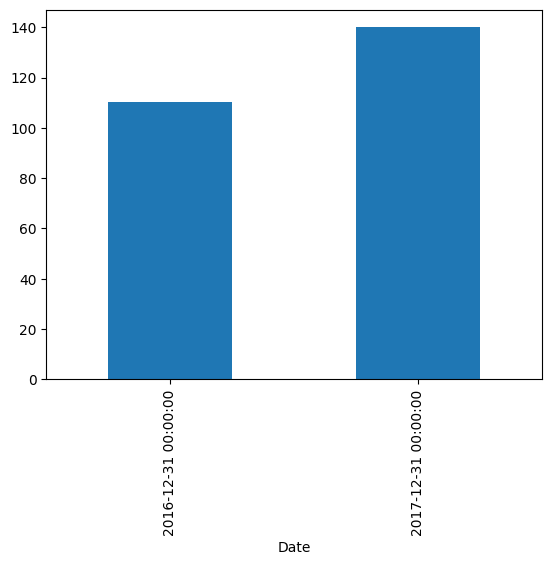

In [34]:
%matplotlib inline
df.Close.resample('Y').mean().plot(kind ='bar')

In [47]:
df0 = df.reset_index()
df0

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...,...
246,2016-07-15,98.92,99.30,98.50,98.78,30136990
247,2016-07-14,97.39,98.99,97.32,98.79,38918997
248,2016-07-13,97.41,97.67,96.84,96.87,25892171
249,2016-07-12,97.17,97.70,97.12,97.42,24167463


In [48]:
df0 = df0.drop('Date', axis = 1)
df0

,Open,High,Low,Close,Volume
0,142.90,144.75,142.90,144.18,19201712
1,143.02,143.50,142.41,142.73,24128782
2,143.69,144.79,142.72,144.09,21569557
3,144.88,145.30,143.10,143.50,14277848
4,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
246,98.92,99.30,98.50,98.78,30136990
247,97.39,98.99,97.32,98.79,38918997
248,97.41,97.67,96.84,96.87,25892171
249,97.17,97.70,97.12,97.42,24167463


In [57]:
rng = pd.date_range("6/1/2017", periods=251, freq='B', name='Date')

In [58]:
df0.set_index(rng, inplace=True)

In [59]:
df0

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-01,142.90,144.75,142.90,144.18,19201712
2017-06-02,143.02,143.50,142.41,142.73,24128782
2017-06-05,143.69,144.79,142.72,144.09,21569557
2017-06-06,144.88,145.30,143.10,143.50,14277848
2017-06-07,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2018-05-11,98.92,99.30,98.50,98.78,30136990
2018-05-14,97.39,98.99,97.32,98.79,38918997
2018-05-15,97.41,97.67,96.84,96.87,25892171


In [61]:
date = ['2017-09-02', '2017/2/23', '2017-09/05']
pd.to_datetime(date, dayfirst=True)

DatetimeIndex(['2017-09-02', '2017-02-23', '2017-05-09'], dtype='datetime64[ns]', freq=None)

In [63]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171


In [62]:
df.shift(1)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,NaN,NaN,NaN,NaN,NaN
2017-07-06,142.90,144.75,142.90,144.18,19201712.0
2017-07-05,143.02,143.50,142.41,142.73,24128782.0
2017-07-03,143.69,144.79,142.72,144.09,21569557.0
2017-06-30,144.88,145.30,143.10,143.50,14277848.0
...,...,...,...,...,...
2016-07-15,98.70,100.13,98.60,99.83,36493867.0
2016-07-14,98.92,99.30,98.50,98.78,30136990.0
2016-07-13,97.39,98.99,97.32,98.79,38918997.0
